29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.7557 - loss: 0.6858 - val_accuracy: 0.8642 - val_loss: 0.3653
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.8714 - loss: 0.3495 - val_accuracy: 0.8801 - val_loss: 0.3293
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.8944 - loss: 0.2896 - val_accuracy: 0.9005 - val_loss: 0.2778
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9033 - loss: 0.2612 - val_accuracy: 0.8967 - val_loss: 0.2785
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9108 - loss: 0.2408 - val_accuracy: 0.9010 - val_loss: 0.2716
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9200 - loss: 0.2143 - val_accuracy: 0.9075 - val_loss: 0.2509
Epoch 7/10
1875/1875

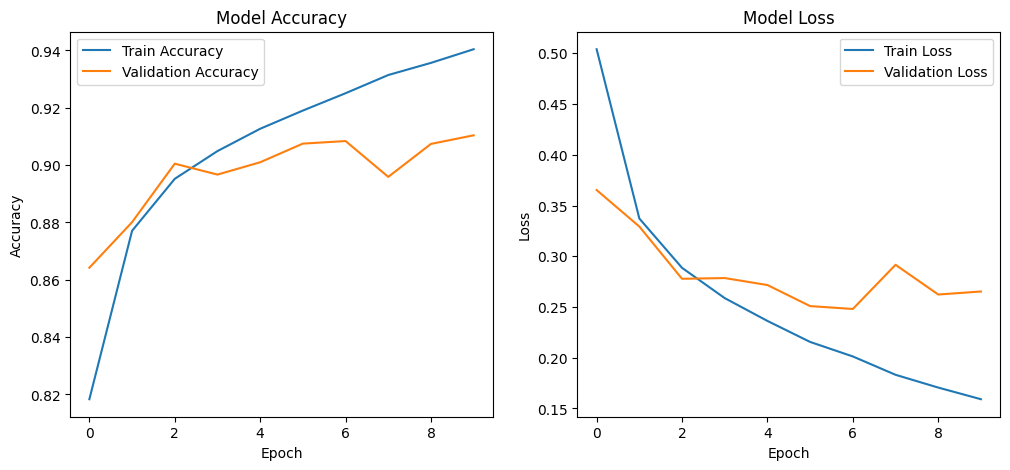

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


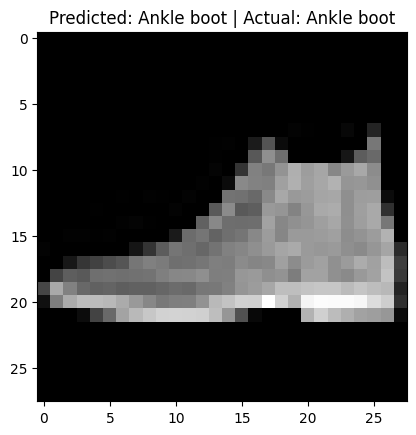

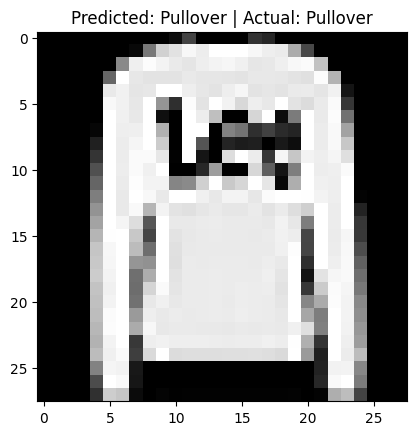

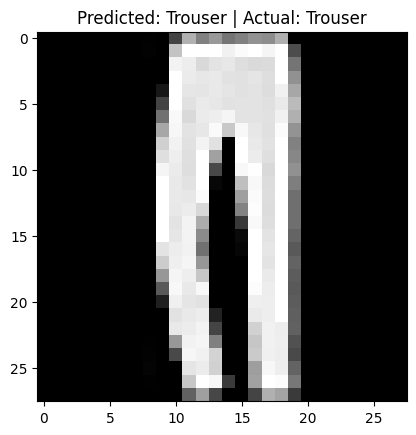

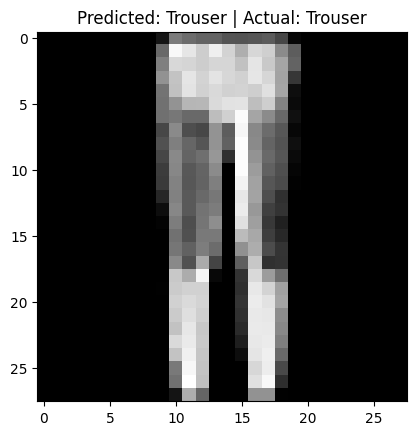

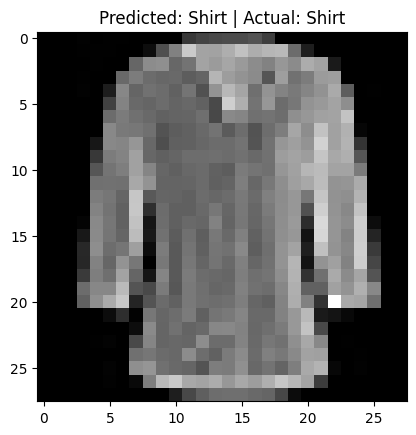

In [ ]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

predictions = model.predict(x_test)

for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]} | Actual: {class_names[y_test[i]]}")
    plt.show()
